In [1]:
import Config as CON
import os
import sys
import random
import json
import time
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import string

import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#Declare some necessary global functions and objects
current_time_ms = lambda: int(round(time.time() * 1000))

## Read triplets

In [2]:
triplets = []
with open('kb_triplets_selected.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    for row in csv_reader:
        triplet = {"e1": row[0], "e2": row[1], "r": row[2]}
        triplets.append(triplet)
    
picked_nere = triplets[1:]

## Cherry Picked Knowledge Graph

In [3]:
def get_top_keywords():
    X = set([])
    for nere in picked_nere:
        X.add(nere["e1"])
        X.add(nere["e2"])
    return X

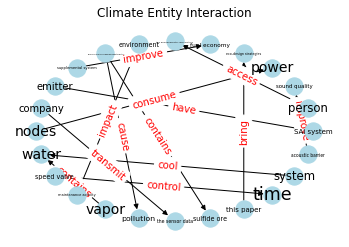

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import random
 
def plot_weighted_graph():
    "Plot a weighted graph"
    #Create a graph object called G
    G = nx.DiGraph()
    
    top_keywords = list(get_top_keywords())
    random.shuffle(top_keywords)
    
    size = {}
    for node in top_keywords:
        G.add_node(node)
        size[node] = (70/len(node))
 
    #Note: You can also try a spring_layout
    layout = "circle"
    #pos = nx.kamada_kawai_layout(G)
    pos = nx.circular_layout(G)
    #pos=nx.random_layout(G) 
    #pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,node_color='lightblue', node_size=300)
 
    #If you want, add labels to the nodes
    labels = {}
    
    for node_name in top_keywords:
        labels[str(node_name)] =str(node_name)
        
    for node, (x, y) in pos.items():
        plt.text(x, y, node, fontsize=size[node], ha='center', va='center')
    #nx.draw_networkx_labels(G,pos,labels,font_size=10, font_color='maroon')
    
    #Add edges
    edge_labels = {}
    for nere in picked_nere:
        G.add_edge(nere["e1"], nere["e2"], weight = 1)
        edge_labels[(nere["e1"],nere["e2"])] = nere["r"]
    
    #Iterate through the graph nodes to gather all the weights
    all_weights = []
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #Get unique weights
    unique_weights = list(set(all_weights))
    
    #Plot the edges - one by one!
    for weight in unique_weights:
        #Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = 1
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width,arrows=True)
    
    #Add edge labels -- relations
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
 
    #Plot the graph
    plt.rcParams["figure.figsize"] = (80,50)
    plt.axis('off')
    plt.title('Climate Entity Interaction')
    plt.savefig("climate_entity_graph_%s.png"%(layout),dpi=1000) 
    plt.show() 

plot_weighted_graph()